Итоговый проект
## КОСМИЧЕСКИЙ ТИТАНИК
## Spaceship Titanic

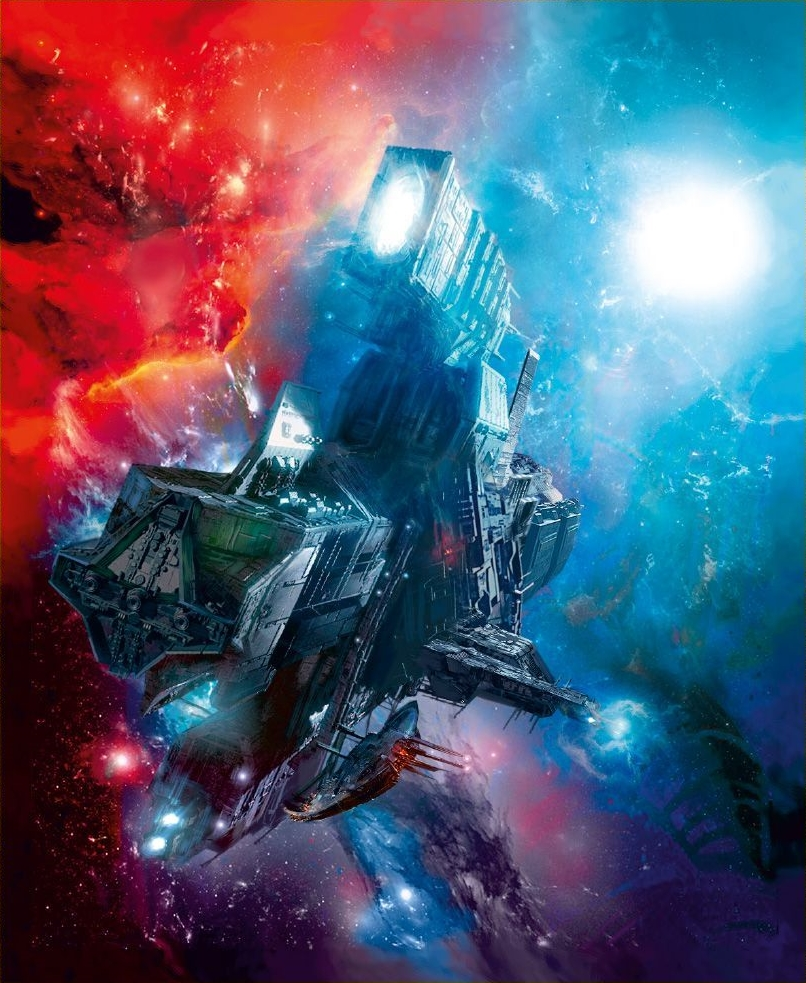

In [1]:
from IPython.display import Image


Image(filename='images/People_are_like_gods_cover.jpg', width=500)

#### Dataset Description

In this competition your task is to predict whether a passenger was transported to an alternate dimension during the _Spaceship Titanic_'s collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

#### File and Data Field Descriptions

* __train.csv__ - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
    * ``PassengerId`` - A unique Id for each passenger. Each Id takes the form ``gggg_pp`` where ``gggg`` indicates a group the passenger is travelling with and ``pp`` is their number within the group. People in a group are often family members, but not always.
    * ``HomePlanet`` - The planet the passenger departed from, typically their planet of permanent residence.
    * ``CryoSleep`` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
    * ``Cabin`` - The cabin number where the passenger is staying. Takes the form ``deck/num/side``, where ``side`` can be either ``P`` for _Port_ or ``S`` for _Starboard_.
    * ``Destination`` - The planet the passenger will be debarking to.
    * ``Age`` - The age of the passenger.
    * ``VIP`` - Whether the passenger has paid for special VIP service during the voyage.
    * ``RoomService``, ``FoodCourt``, ``ShoppingMall``, ``Spa``, ``VRDeck`` - Amount the passenger has billed at each of the _Spaceship Titanic_'s many luxury amenities.
    * ``Name`` - The first and last names of the passenger.
    * ``Transported`` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
* __test.csv__ - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of ``Transported`` for the passengers in this set. 
* __sample_submission.csv__ - A submission file in the correct format.
    * ``PassengerId`` - Id for each passenger in the test set.
    * ``Transported`` - The target. For each passenger, predict either ``True`` or ``False``.

#### Открытие датасета

In [2]:
import pandas as pd

Отключение ограничений вывода количества строк и столбцов:

In [3]:
pd.set_option('display.max_columns', None, 'display.max_rows', None)

Развед. анализ данных и обучение моделей будет проводиться для __train.csv__

In [4]:
# const
data_patch = "data/Spaceship_Titanic/train.csv"

In [5]:
# data
df = pd.read_csv(data_patch)

#### Обзор датасета

Информация о наборе данных:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Описательная статистика численных столбцов:

In [7]:
df.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

Распределение пассажиров по возрастам:

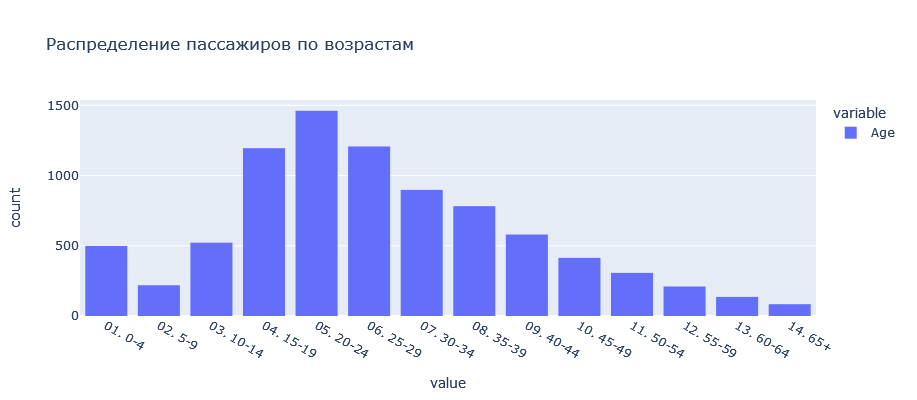

In [8]:
import numpy as np
import plotly.express as px


df_Age = pd.cut(
    df['Age'], 
    bins = [-np.inf, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, np.inf],
    labels = ['01. 0-4', '02. 5-9', '03. 10-14', '04. 15-19', '05. 20-24', '06. 25-29', '07. 30-34',
              '08. 35-39','09. 40-44', '10. 45-49', '11. 50-54', '12. 55-59', '13. 60-64', '14. 65+']
)

fig = px.histogram(df_Age,
                   height=400, width=800,
                   title='Распределение пассажиров по возрастам')
fig.update_xaxes(categoryorder='category ascending')
fig

Категориальные признаки:

In [9]:
df.describe(include=['object'])

PassengerId HomePlanet CryoSleep    Cabin  Destination    VIP  \
count         8693       8492      8476     8494         8511   8490   
unique        8693          3         2     6560            3      2   
top        0001_01      Earth     False  G/734/S  TRAPPIST-1e  False   
freq             1       4602      5439        8         5915   8291   

                  Name  
count             8493  
unique            8473  
top     Gollux Reedall  
freq                 2

In [10]:
df["HomePlanet"].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

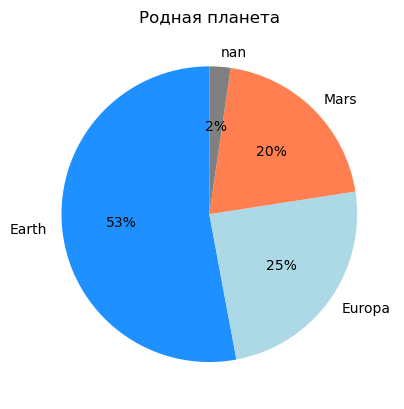

In [11]:
import matplotlib.pyplot as plt


# Круговая диаграмма
plt.pie(df["HomePlanet"].value_counts(dropna=False),
        labels=df["HomePlanet"].value_counts(dropna=False).index.values,
        colors=['dodgerblue', 'lightblue', 'coral', 'gray'],
        autopct='%.0f%%',
        startangle=90)
plt.title('Родная планета')  # заголовок
plt.show()

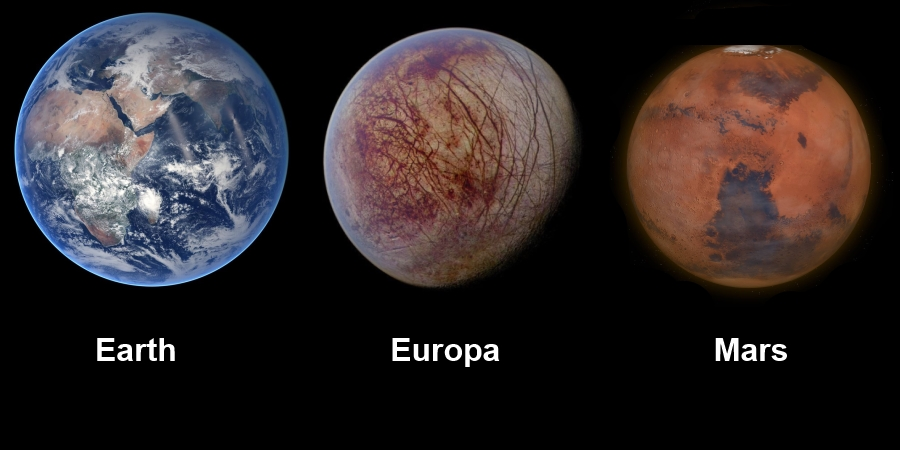

In [12]:
Image(filename='images/Home_planets.jpg')

In [13]:
df["CryoSleep"].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [14]:
df["Cabin"].nunique()

6560

In [15]:
df["Destination"].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

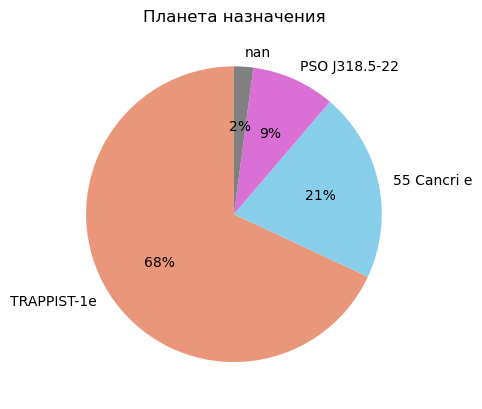

In [16]:
# Круговая диаграмма
plt.pie(df["Destination"].value_counts(dropna=False),
        labels=df["Destination"].value_counts(dropna=False).index.values,
        colors=['darksalmon', 'skyblue', 'orchid', 'gray'],
        autopct='%.0f%%',
        startangle=90)
plt.title('Планета назначения')  # заголовок
plt.show()

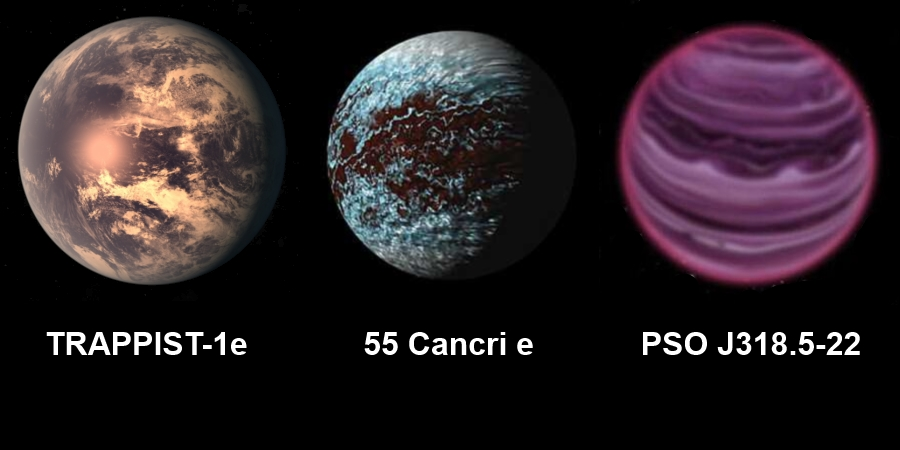

In [17]:
Image(filename='images/Exoplanets.jpg')

In [18]:
df["VIP"].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [19]:
df["Transported"].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

Фактически значения колонок ``CryoSleep`` и ``VIP`` являются бинарными, хотя определены как категориальные

#### Пропуски

Количество пропусков по столбцам:

In [20]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Доля пропусков по столбцам:

In [21]:
df.isnull().sum() / df.shape[0]

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

Доля пропусков менее 3%. Общая сумма строк с пропусками:

In [22]:
df.shape[0] - df.dropna().shape[0]

2087

2087 строк из 8693 имеют пропуски. В дальнейшем это нужно будет учитывать.

#### Корреляции и зависимость целевой переменной

In [23]:
import seaborn as sns

Тепловая карта корреляций численных и бинарных столбцов:

<AxesSubplot:>

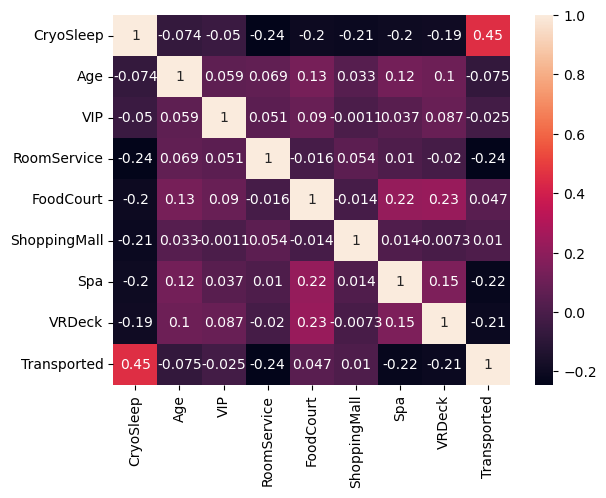

In [24]:
#df = df.astype({"CryoSleep": 'bool', "VIP": 'bool'})  # бинаризация NaN => True
sns.heatmap(
    df.astype({"CryoSleep": 'bool', "VIP": 'bool'}).loc[:, ["CryoSleep", "Age", "VIP", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Transported"]].corr(),
    annot=True
)

Целевая переменная ``Transported`` имеет наиболее высокую корреляцию (0.45) с переменной ``CryoSleep``. Все остальные корреляции между переменными незначительны.

#### 1. Модель логистической регрессии

Выбор значений и заполнение пропусков в датасете:

In [25]:
df1 = df.drop(['PassengerId', 'Cabin', 'Name'],axis=1)#.dropna()  # выбор признаков для модели

In [26]:
df1 = pd.get_dummies(data=df1, dummy_na=True)  # бинаризация категориальных признаков методом One-hot-кодирование

In [27]:
#df1 = df1.dropna()  # удаление оставшихся пропусков
df1 = df1.fillna(df1.mean())  # заполнение пропусков признаков float64 средними значениями

Обучение модели:

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


X = df1.drop('Transported', axis=1)
y = df1['Transported']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=1)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

model_LR = LogisticRegression()
model_LR.fit(X_train_std, y_train)

LogisticRegression()

Значения влияния весов каждого признака на целевую переменную:

In [29]:
df1_coefs = pd.DataFrame(data=model_LR.coef_, columns=X.columns).T
df1_coefs.columns = ['Coefficient']
df1_coefs

Coefficient
Age                          -0.124134
RoomService                  -0.901672
FoodCourt                     0.776559
ShoppingMall                  0.333090
Spa                          -1.935685
VRDeck                       -2.021702
HomePlanet_Earth             -0.415456
HomePlanet_Europa             0.549984
HomePlanet_Mars              -0.054146
HomePlanet_nan               -0.052282
CryoSleep_False              -0.303301
CryoSleep_True                0.324682
CryoSleep_nan                -0.050245
Destination_55 Cancri e       0.098488
Destination_PSO J318.5-22    -0.041865
Destination_TRAPPIST-1e      -0.077626
Destination_nan               0.057780
VIP_False                     0.024687
VIP_True                     -0.048999
VIP_nan                       0.014891

Предсказания (ответы) алгоритма:

In [30]:
y_pred = model_LR.predict(X_test_std)
y_pred_train = model_LR.predict(X_train_std)

Метрики:

In [31]:
from sklearn.metrics import accuracy_score


print(f'Accuracy Train: {accuracy_score(y_train, y_pred_train)}')
print(f'Accuracy Test: {accuracy_score(y_test, y_pred)}')

Accuracy Train: 0.7863100373885533
Accuracy Test: 0.7883841288096607


In [32]:
from sklearn.metrics import precision_score, recall_score


print(f'Precision Train: {precision_score(y_train, y_pred_train)}')
print(f'Precision Test: {precision_score(y_test, y_pred)}\n')

print(f'Recall Train: {recall_score(y_train, y_pred_train)}')
print(f'Recall Test: {recall_score(y_test, y_pred)}')

Precision Train: 0.7809364548494984
Precision Test: 0.7879818594104309

Recall Train: 0.8001142204454598
Recall Test: 0.79337899543379


In [33]:
from sklearn.metrics import f1_score


print(f'F1 Train: {f1_score(y_train, y_pred_train)}')
print(f'F1 Test: {f1_score(y_test, y_pred)}')

F1 Train: 0.7904090267983075
F1 Test: 0.7906712172923777


In [34]:
from sklearn.metrics import roc_auc_score


y_pred_score = model_LR.predict_proba(X_test_std)
y_pred_train_score = model_LR.predict_proba(X_train_std)

print(f'ROC-AUC Train: {roc_auc_score(y_train, y_pred_train_score[:,1])}')
print(f'ROC-AUC Test: {roc_auc_score(y_test, y_pred_score[:,1])}')

ROC-AUC Train: 0.8699166194056962
ROC-AUC Test: 0.877324772350884


График ROC-кривой для ``train`` и ``test`` данных:

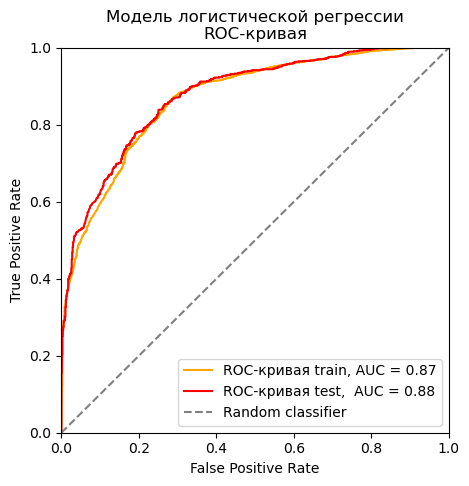

In [35]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt


# train
y_pred_proba_train = model_LR.predict_proba(X_train_std)[::,1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_proba_train)
roc_auc_train = auc(fpr_train, tpr_train)

# test
y_pred_proba_test = model_LR.predict_proba(X_test_std)[::,1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test)
roc_auc_test = auc(fpr_test, tpr_test)

# график
plt.figure(figsize=(5, 5))  # размер полотна для графика
plt.plot(fpr_train, tpr_train, color='orange',
         label=f'ROC-кривая train, AUC = {round(roc_auc_train, 2)}')  # train кривая
plt.plot(fpr_test, tpr_test, color='red',
         label=f'ROC-кривая test,  AUC = {round(roc_auc_test, 2)}')  # test кривая
plt.plot([0, 1], [0, 1], color='gray', linestyle='--',
         label='Random classifier')  # диагональ случайного алгоритма (const)
plt.xlim([0.0, 1.0])  # ось x
plt.ylim([0.0, 1.0])  # ось y
plt.xlabel('False Positive Rate')  # подпись оси x
plt.ylabel('True Positive Rate')  # подпись оси y
plt.title('Модель логистической регрессии\nROC-кривая')  # заголовок
plt.legend(loc="lower right")  # расположение легенды
plt.show()

#### 2. Модель дерева решений

Подготовка датасета:

In [36]:
df2 = df.drop(['PassengerId', 'Cabin', 'Name'],axis=1)  # выбор признаков для модели
df2 = pd.get_dummies(data=df2, dummy_na=True)  # бинаризация категориальных признаков методом One-hot-кодирование
df2 = df2.fillna(df1.median())  # заполнение пропусков признаков float64 средними значениями

Обучение модели:

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


X = df2.drop('Transported', axis=1)
y = df2['Transported']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=1)

model_DT = DecisionTreeClassifier(max_depth=3,  # макимальная глубина дерева
                                  random_state=1)
model_DT.fit(X_train.values, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

Построение дерева решений:

In [38]:
import eli5


eli5.explain_weights_sklearn(model_DT, feature_names=X_train.columns.values)

Explanation(estimator='DecisionTreeClassifier(max_depth=3, random_state=1)', description='\nDecision tree feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='decision tree', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='CryoSleep_True', weight=0.6742490437965649, std=None, value=None), FeatureWeight(feature='Spa', weight=0.12073845734110404, std=None, value=None), FeatureWeight(feature='HomePlanet_Earth', weight=0.0978036595866947, std=None, value=None), FeatureWeight(feature='RoomService', weight=0.09098023322201952, std=None, value=None), FeatureWeight(feature='FoodCourt', weight=0.007835133705285298, std=None, value=None), FeatureWeight(feature='HomePlanet_Europa', weight=0.004350616885832239, std=None, value=None), FeatureWeight(feature='Destination_TRAPPIST-1e', weight=0.004042855462499321, std=None, value=None), FeatureWeight(feature='VIP_nan', weight=0.0, std=None, value=None), FeatureWeight(feature='HomePlanet_Mars', weight=0.0, std=None, value=None), FeatureWeight(feature='ShoppingMall', weight=0.0, std=None, value=None), FeatureWeight(feature='VRDeck', weight=0.0, std=None, value=None), FeatureWeight(feature='HomePlanet_nan', weight=0.0, std=None, value=None), FeatureWeight(feature='VIP_True', weight=0.0, std=None, value=None), FeatureWeight(feature='CryoSleep_False', weight=0.0, std=None, value=None), FeatureWeight(feature='CryoSleep_nan', weight=0.0, std=None, value=None), FeatureWeight(feature='Destination_55 Cancri e', weight=0.0, std=None, value=None), FeatureWeight(feature='Destination_PSO J318.5-22', weight=0.0, std=None, value=None), FeatureWeight(feature='Destination_nan', weight=0.0, std=None, value=None), FeatureWeight(feature='VIP_False', weight=0.0, std=None, value=None), FeatureWeight(feature='Age', weight=0.0, std=None, value=None)], remaining=0), decision_tree=TreeInfo(criterion='gini', tree=NodeInfo(id=0, is_leaf=False, value=[3452.0, 3502.0], value_ratio=[0.49640494679321256, 0.5035950532067874], impurity=0.49997415118488076, samples=6954, sample_ratio=1.0, feature_name='CryoSleep_True', feature_id=11, threshold=0.5, left=NodeInfo(id=1, is_leaf=False, value=[3005.0, 1519.0], value_ratio=[0.6642351900972591, 0.33576480990274093], impurity=0.4460536046674344, samples=4524, sample_ratio=0.6505608283002589, feature_name='RoomService', feature_id=1, threshold=346.5, left=NodeInfo(id=2, is_leaf=False, value=[2048.0, 1343.0], value_ratio=[0.6039516366853436, 0.3960483633146564], impurity=0.4783881144608767, samples=3391, sample_ratio=0.48763301696865113, feature_name='Spa', feature_id=4, threshold=266.5, left=NodeInfo(id=3, is_leaf=True, value=[1191.0, 1142.0], value_ratio=[0.5105015002143163, 0.48949849978568366], impurity=0.4997794369864974, samples=2333, sample_ratio=0.33549036525740583, feature_name=None, feature_id=None, threshold=None, left=None, right=None), right=NodeInfo(id=4, is_leaf=True, value=[857.0, 201.0], value_ratio=[0.8100189035916824, 0.1899810964083176], impurity=0.30777655883162225, samples=1058, sample_ratio=0.15214265171124533, feature_name=None, feature_id=None, threshold=None, left=None, right=None)), right=NodeInfo(id=5, is_leaf=False, value=[957.0, 176.0], value_ratio=[0.8446601941747572, 0.1553398058252427], impurity=0.26241870110283716, samples=1133, sample_ratio=0.16292781133160772, feature_name='FoodCourt', feature_id=2, threshold=1173.5, left=NodeInfo(id=6, is_leaf=True, value=[924.0, 152.0], value_ratio=[0.8587360594795539, 0.1412639405204461], impurity=0.2426168792581639, samples=1076, sample_ratio=0.1547310900201323, feature_name=None, feature_id=None, threshold=None, left=None, right=None), right=NodeInfo(id=7, is_leaf=True, value=[33.0, 24.0], value_ratio=[0.5789473684210527, 0.42105263157894735], impurity=0.48753462603878117, samples=57, sample_ratio=0.00819672131147541, feature_name=None, feature_id=None, threshold=None, left=None, right=None))), right=NodeIn

[Text(0.5, 0.875, 'CryoSleep_True <= 0.5\ngini = 0.5\nsamples = 6954\nvalue = [3452, 3502]'),
 Text(0.25, 0.625, 'RoomService <= 346.5\ngini = 0.446\nsamples = 4524\nvalue = [3005, 1519]'),
 Text(0.125, 0.375, 'Spa <= 266.5\ngini = 0.478\nsamples = 3391\nvalue = [2048, 1343]'),
 Text(0.0625, 0.125, 'gini = 0.5\nsamples = 2333\nvalue = [1191, 1142]'),
 Text(0.1875, 0.125, 'gini = 0.308\nsamples = 1058\nvalue = [857, 201]'),
 Text(0.375, 0.375, 'FoodCourt <= 1173.5\ngini = 0.262\nsamples = 1133\nvalue = [957, 176]'),
 Text(0.3125, 0.125, 'gini = 0.243\nsamples = 1076\nvalue = [924, 152]'),
 Text(0.4375, 0.125, 'gini = 0.488\nsamples = 57\nvalue = [33, 24]'),
 Text(0.75, 0.625, 'HomePlanet_Earth <= 0.5\ngini = 0.3\nsamples = 2430\nvalue = [447, 1983]'),
 Text(0.625, 0.375, 'HomePlanet_Europa <= 0.5\ngini = 0.094\nsamples = 1329\nvalue = [66, 1263]'),
 Text(0.5625, 0.125, 'gini = 0.173\nsamples = 607\nvalue = [58, 549]'),
 Text(0.6875, 0.125, 'gini = 0.022\nsamples = 722\nvalue = [8, 714]'

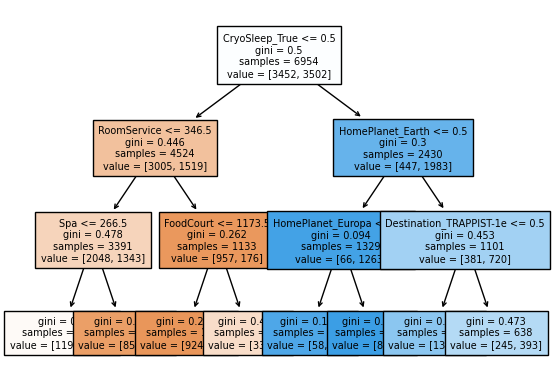

In [92]:
from sklearn import tree


tree.plot_tree(model_DT,
               feature_names=list(df2.drop('Transported', axis=1)),
               filled=True,
               fontsize=7)

Предсказания (ответы) алгоритма:

In [41]:
y_pred = model_DT.predict(X_test_std)
y_pred_train = model_DT.predict(X_train_std)

Метрики:

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


print(f'Accuracy Train: {accuracy_score(y_train, y_pred_train)}')
print(f'Accuracy Test: {accuracy_score(y_test, y_pred)}')

print(f'Precision Train: {precision_score(y_train, y_pred_train)}')
print(f'Precision Test: {precision_score(y_test, y_pred)}')

print(f'Recall Train: {recall_score(y_train, y_pred_train)}')
print(f'Recall Test: {recall_score(y_test, y_pred)}')

print(f'F1 Train: {f1_score(y_train, y_pred_train)}')
print(f'F1 Test: {f1_score(y_test, y_pred)}')

y_pred_score = model_DT.predict_proba(X_test_std)
y_pred_train_score = model_DT.predict_proba(X_train_std)

print(f'ROC-AUC Train: {roc_auc_score(y_train, y_pred_train_score[:,1])}')
print(f'ROC-AUC Test: {roc_auc_score(y_test, y_pred_score[:,1])}')

Accuracy Train: 0.7172850158182341
Accuracy Test: 0.7222541690626797
Precision Train: 0.8160493827160494
Precision Test: 0.8237232289950577
Recall Train: 0.5662478583666476
Recall Test: 0.5707762557077626
F1 Train: 0.6685772083614295
F1 Test: 0.6743088334457182
ROC-AUC Train: 0.7389501976357824
ROC-AUC Test: 0.743889453271745


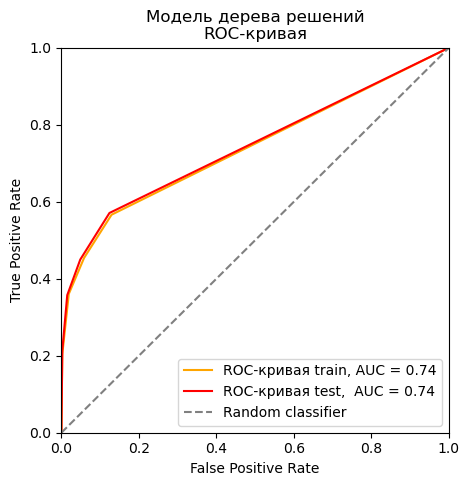

In [43]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt


# train
y_pred_proba_train = model_DT.predict_proba(X_train_std)[::,1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_proba_train)
roc_auc_train = auc(fpr_train, tpr_train)

# test
y_pred_proba_test = model_DT.predict_proba(X_test_std)[::,1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test)
roc_auc_test = auc(fpr_test, tpr_test)

# график
plt.figure(figsize=(5, 5))  # размер полотна для графика
plt.plot(fpr_train, tpr_train, color='orange',
         label=f'ROC-кривая train, AUC = {round(roc_auc_train, 2)}')  # train кривая
plt.plot(fpr_test, tpr_test, color='red',
         label=f'ROC-кривая test,  AUC = {round(roc_auc_test, 2)}')  # test кривая
plt.plot([0, 1], [0, 1], color='gray', linestyle='--',
         label='Random classifier')  # диагональ случайного алгоритма (const)
plt.xlim([0.0, 1.0])  # ось x
plt.ylim([0.0, 1.0])  # ось y
plt.xlabel('False Positive Rate')  # подпись оси x
plt.ylabel('True Positive Rate')  # подпись оси y
plt.title('Модель дерева решений\nROC-кривая')  # заголовок
plt.legend(loc="lower right")  # расположение легенды
plt.show()

#### 3. Модель случайного леса

Подготовка датасета:

In [44]:
df3 = df2  # аналогично датасету для дерева решений

Обучение модели:

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


X = df3.drop('Transported', axis=1)
y = df3['Transported']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=1)

model_RF = RandomForestClassifier(n_estimators=6,  # количество деревьев
                                  max_depth=4,  # максимальная глубина дерева
                                  random_state=1)
model_RF.fit(X_train.values, y_train)

RandomForestClassifier(max_depth=4, n_estimators=6, random_state=1)

Получение предсказаний (ответов) алгоритма:

In [46]:
y_pred = model_RF.predict(X_test_std)
y_pred_train = model_RF.predict(X_train_std)

Метрики:

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


print(f'Accuracy Train: {accuracy_score(y_train, y_pred_train)}')
print(f'Accuracy Test: {accuracy_score(y_test, y_pred)}')

print(f'Precision Train: {precision_score(y_train, y_pred_train)}')
print(f'Precision Test: {precision_score(y_test, y_pred)}')

print(f'Recall Train: {recall_score(y_train, y_pred_train)}')
print(f'Recall Test: {recall_score(y_test, y_pred)}')

print(f'F1 Train: {f1_score(y_train, y_pred_train)}')
print(f'F1 Test: {f1_score(y_test, y_pred)}')

y_pred_score = model_RF.predict_proba(X_test_std)
y_pred_train_score = model_RF.predict_proba(X_train_std)

print(f'ROC-AUC Train: {roc_auc_score(y_train, y_pred_train_score[:,1])}')
print(f'ROC-AUC Test: {roc_auc_score(y_test, y_pred_score[:,1])}')

Accuracy Train: 0.6071325855622663
Accuracy Test: 0.6066705002875216
Precision Train: 0.5644891122278057
Precision Test: 0.564343163538874
Recall Train: 0.9623072529982867
Recall Test: 0.9611872146118722
F1 Train: 0.7115709459459459
F1 Test: 0.7111486486486488
ROC-AUC Train: 0.7855680299884918
ROC-AUC Test: 0.7875878982206066


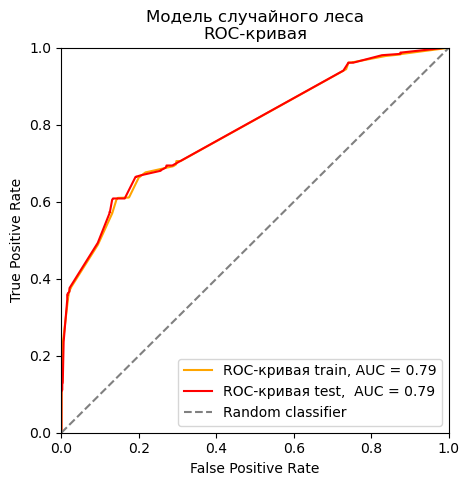

In [48]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt


# train
y_pred_proba_train = model_RF.predict_proba(X_train_std)[::,1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_proba_train)
roc_auc_train = auc(fpr_train, tpr_train)

# test
y_pred_proba_test = model_RF.predict_proba(X_test_std)[::,1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test)
roc_auc_test = auc(fpr_test, tpr_test)

# график
plt.figure(figsize=(5, 5))  # размер полотна для графика
plt.plot(fpr_train, tpr_train, color='orange',
         label=f'ROC-кривая train, AUC = {round(roc_auc_train, 2)}')  # train кривая
plt.plot(fpr_test, tpr_test, color='red',
         label=f'ROC-кривая test,  AUC = {round(roc_auc_test, 2)}')  # test кривая
plt.plot([0, 1], [0, 1], color='gray', linestyle='--',
         label='Random classifier')  # диагональ случайного алгоритма (const)
plt.xlim([0.0, 1.0])  # ось x
plt.ylim([0.0, 1.0])  # ось y
plt.xlabel('False Positive Rate')  # подпись оси x
plt.ylabel('True Positive Rate')  # подпись оси y
plt.title('Модель случайного леса\nROC-кривая')  # заголовок
plt.legend(loc="lower right")  # расположение легенды
plt.show()

#### 4. Нейросетевая модель Keras TensorFlow

Подготовка датасета:

In [49]:
# объединение признаков в строки
#df4 = df.loc[:, df.columns != 'Transported'].astype('str')
df4 = df.iloc[:, 1:-1].astype('str').agg(' '.join, axis= 1 )  # без колонки индексов и таргета

In [50]:
# сборка датасета
df4 = pd.DataFrame({'Text': df4,  # единая колонка признаков
                    'Target': df['Transported']})  # колонка ответов

In [51]:
# перемешивание
df4 = df4.sample(frac=1, random_state=1)

In [52]:
# разделение на 0.70, 0.15, 0.15
train, validate, test = np.split(df4, [int(0.7*len(df4)), int(0.85*len(df4))])

In [53]:
df4.head(3)

Text  Target
1454  Europa nan A/17/S 55 Cancri e 32.0 False 54.0 ...    True
218   Earth True G/36/S PSO J318.5-22 27.0 False 0.0...   False
7866  Earth False F/1610/S PSO J318.5-22 24.0 False ...   False

In [54]:
print(train.shape)
print(validate.shape)
print(test.shape)

(6085, 2)
(1304, 2)
(1304, 2)


In [55]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer


# создаем единый словарь (слово -> число) для преобразования
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df4['Text'].tolist())

# Преобразуем все описания в числовые последовательности, заменяя слова на числа по словарю.
X_train = tokenizer.texts_to_sequences(train['Text'].tolist())
X_validate = tokenizer.texts_to_sequences(validate['Text'].tolist())
X_test = tokenizer.texts_to_sequences(test['Text'].tolist())

In [56]:
# Преобразуем описания заявок в векторы чисел.
X_train = tokenizer.sequences_to_matrix(X_train, mode='binary')
X_validate = tokenizer.sequences_to_matrix(X_validate, mode='binary')
X_test = tokenizer.sequences_to_matrix(X_test, mode='binary')
print('Размерность X_train:', X_train.shape)
print('Размерность X_test:', X_test.shape)

# Преобразуем ответы в матрицу двоичных чисел
y_train = train['Target']
y_validate = validate['Target']
y_test = test['Target']
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Размерность X_train: (6085, 8154)
Размерность X_test: (1304, 8154)
y_train shape: (6085,)
y_test shape: (1304,)


In [57]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(8154,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_validate, y_validate))

C:\Users\User\anaconda3\lib\site-packages\keras\optimizers\legacy\rmsprop.py:143: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



Epoch 1/20
12/12 [==============================] - 2s 61ms/step - loss: 0.6870 - binary_accuracy: 0.5979 - val_loss: 0.6746 - val_binary_accuracy: 0.6580
Epoch 2/20
12/12 [==============================] - 0s 29ms/step - loss: 0.6537 - binary_accuracy: 0.7039 - val_loss: 0.6466 - val_binary_accuracy: 0.6787
Epoch 3/20
12/12 [==============================] - 0s 30ms/step - loss: 0.6086 - binary_accuracy: 0.7402 - val_loss: 0.6211 - val_binary_accuracy: 0.6871
Epoch 4/20
12/12 [==============================] - 0s 29ms/step - loss: 0.5599 - binary_accuracy: 0.7670 - val_loss: 0.6034 - val_binary_accuracy: 0.6956
Epoch 5/20
12/12 [==============================] - 0s 34ms/step - loss: 0.5130 - binary_accuracy: 0.7938 - val_loss: 0.5901 - val_binary_accuracy: 0.7048
Epoch 6/20
12/12 [==============================] - 0s 30ms/step - loss: 0.4705 - binary_accuracy: 0.8169 - val_loss: 0.5840 - val_binary_accuracy: 0.6879
Epoch 7/20
12/12 [==============================] - 0s 29ms/step - los

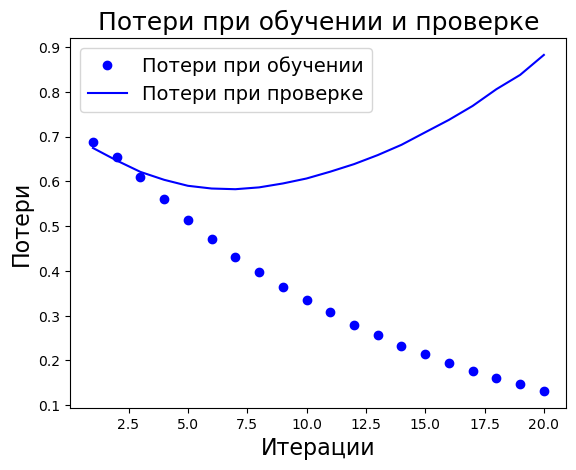

In [58]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Потери при обучении')
plt.plot(epochs, val_loss_values, 'b', label='Потери при проверке')
plt.title('Потери при обучении и проверке',  fontsize=18)
plt.xlabel('Итерации',  fontsize=16)
plt.ylabel('Потери',  fontsize=16)
plt.legend(fontsize=14)

plt.show()

In [59]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(8154,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(X_test, y_test)
print (results)

Epoch 1/4
12/12 [==============================] - 1s 25ms/step - loss: 0.6854 - accuracy: 0.5698
Epoch 2/4
12/12 [==============================] - 0s 31ms/step - loss: 0.6557 - accuracy: 0.6618
Epoch 3/4
12/12 [==============================] - 1s 54ms/step - loss: 0.6230 - accuracy: 0.7029
Epoch 4/4
41/41 [==============================] - 0s 3ms/step - loss: 0.6045 - accuracy: 0.6994
[0.604520320892334, 0.699386477470398]


In [60]:
import numpy as np


np.asarray(df4)#.astype('float32')

array([['Europa nan A/17/S 55 Cancri e 32.0 False 54.0 3782.0 0.0 21.0 5.0 Alyadum Barmant',
        True],
       ['Earth True G/36/S PSO J318.5-22 27.0 False 0.0 nan 0.0 0.0 0.0 Nica Bakerrison',
        False],
       ['Earth False F/1610/S PSO J318.5-22 24.0 False 86.0 669.0 1.0 0.0 0.0 Therly Brightez',
        False],
       ...,
       ['Earth False F/203/P TRAPPIST-1e 24.0 False nan 32.0 8.0 0.0 0.0 Lesley Coxterez',
        False],
       ['Mars True F/1146/P TRAPPIST-1e 47.0 False 0.0 0.0 0.0 0.0 0.0 Diedow Gele',
        True],
       ['Earth False F/53/P TRAPPIST-1e 30.0 False 335.0 695.0 541.0 0.0 0.0 Leenny Byerry',
        False]], dtype=object)

In [61]:
np.asarray(df['Transported'])

array([False,  True, False, ...,  True, False,  True])